In [1]:
## IMPORTACIÓN GENERAL DE LIBRERIAS Y VISUALIZACIÓN DE DATOS (matplotlib y seaborn)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as DT
import warnings
import sys

from PIL import Image 
from langdetect import detect
from wordcloud import WordCloud 

%matplotlib inline
warnings.filterwarnings('ignore')
plt.style.use('default') 
sns.set(style="whitegrid") 
plt.rcParams['figure.figsize'] = (18, 18)

np.set_printoptions(threshold=sys.maxsize)

In [2]:
#Leemos el CSV
datos = pd.read_csv('../data/train.csv')

In [3]:
def filtrarPalabras(miArray):
    variable = ''
    for key in miArray:
         if '#' in str(key):
            variable = variable + ' ' + str(key)
    return variable

In [4]:
datos.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
datos['text'] = datos['text'].str.lower()
datos['length'] = datos['text'].str.len()
datos['totalwords'] = datos['text'].str.split().str.len()
datos['words'] = datos.text.str.strip().str.split()

In [6]:
selected_words_singular=['fire','flood','inundate','earthquake','quake','deluge','euption','twister','tornado','hurricane', 'landslide','typhoon','wildfire','forest fire','drought','avalanche','urgent','important','danger','warrning','evacuation']
selected_words_plural=['fires','floods', 'earthquakes','quakes','deluges','rashes','tornadoes','hurricanes', 'landslides','typhoons','wildfires','forest fires','droughts','avalanches']
selected_words_other=['heat wave','died','flooding','flooded','damage','urgent','important','danger','warrning','help','evacuation']
col_one_list = datos['keyword'].tolist()
selected_words = selected_words_singular + selected_words_plural + selected_words_other + col_one_list
s = set(selected_words)

In [7]:
datos = datos.assign(hashtags=[filtrarPalabras(el) for el in datos.words])
datos = datos.assign(matches=[len(set(el) & s) for el in datos.words])
datos.head()

,id,keyword,location,text,target,length,totalwords,words,hashtags,matches
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,69,13,"[our, deeds, are, the, reason, of, this, #eart...",#earthquake,0
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,"[forest, fire, near, la, ronge, sask., canada]",,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,133,22,"[all, residents, asked, to, 'shelter, in, plac...",,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,8,"[13,000, people, receive, #wildfires, evacuati...",#wildfires,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,88,16,"[just, got, sent, this, photo, from, ruby, #al...",#alaska #wildfires,1


In [8]:
SinMatchesConTarget = datos[(datos['target'] == 1) & (datos['matches'] == 0)]
pd.set_option('display.max_colwidth', -1)
SinMatchesConTarget.head()

,id,keyword,location,text,target,length,totalwords,words,hashtags,matches
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,13,"[our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]",#earthquake,0
12,18,NaN,NaN,#raining #flooding #florida #tampabay #tampa 18 or 19 days. i've lost count,1,76,12,"[#raining, #flooding, #florida, #tampabay, #tampa, 18, or, 19, days., i've, lost, count]",#raining #flooding #florida #tampabay #tampa,0
13,19,NaN,NaN,#flood in bago myanmar #we arrived bago,1,39,7,"[#flood, in, bago, myanmar, #we, arrived, bago]",#flood #we,0
79,114,accident,"Njoro, Kenya",the pastor was not in the scene of the accident......who was the owner of the range rover ?,1,91,18,"[the, pastor, was, not, in, the, scene, of, the, accident......who, was, the, owner, of, the, range, rover, ?]",,0
83,120,accident,"Arlington, TX",#truckcrash overturns on #fortworth interstate http://t.co/rs22lj4qfp click here if you've been in a crash&gt;http://t.co/ld0uniyw4k,1,132,14,"[#truckcrash, overturns, on, #fortworth, interstate, http://t.co/rs22lj4qfp, click, here, if, you've, been, in, a, crash&gt;http://t.co/ld0uniyw4k]",#truckcrash #fortworth,0


In [9]:
agrupado = datos.groupby(['target', 'matches', 'totalwords'])["id"].count().reset_index(name="cantidad")
agrupado = agrupado[['target','matches','totalwords','cantidad']]
agrupado.head()

,target,matches,totalwords,cantidad
0,0,0,1,4
1,0,0,2,15
2,0,0,3,31
3,0,0,4,40
4,0,0,5,37


<Figure size 1170x827 with 0 Axes>

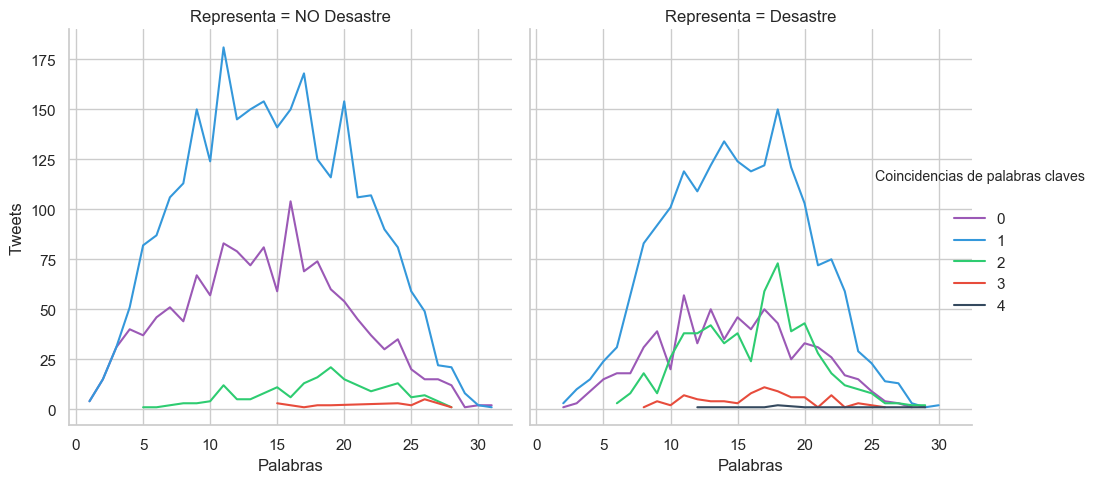

In [10]:
agrupado['Representa'] = "NO Desastre"
agrupado.loc[agrupado['target'] == 1, 'Representa'] = "Desastre"

plt.figure(figsize=(11.7, 8.27))
flatui = ["#9b59b6", "#3498db", "#2ecc71", "#e74c3c", "#34495e"]
g = sns.relplot(x="totalwords", y="cantidad", col="Representa", palette=flatui,  hue="matches", kind="line", data=agrupado)
g._legend.texts[0].set_text("")
g._legend.set_title("Coincidencias de palabras claves")
g.set(xlabel='Palabras', ylabel='Tweets')

In [11]:
datos['language'] = detect(str(datos['text']))
datos['hashtagsCantidad'] = datos['hashtags'].str.count('#')
datos.head()

,id,keyword,location,text,target,length,totalwords,words,hashtags,matches,language,hashtagsCantidad
0,1,NaN,NaN,our deeds are the reason of this #earthquake may allah forgive us all,1,69,13,"[our, deeds, are, the, reason, of, this, #earthquake, may, allah, forgive, us, all]",#earthquake,0,en,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,38,7,"[forest, fire, near, la, ronge, sask., canada]",,1,en,0
2,5,NaN,NaN,all residents asked to 'shelter in place' are being notified by officers. no other evacuation or shelter in place orders are expected,1,133,22,"[all, residents, asked, to, 'shelter, in, place', are, being, notified, by, officers., no, other, evacuation, or, shelter, in, place, orders, are, expected]",,1,en,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in california",1,65,8,"[13,000, people, receive, #wildfires, evacuation, orders, in, california]",#wildfires,1,en,1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as smoke from #wildfires pours into a school,1,88,16,"[just, got, sent, this, photo, from, ruby, #alaska, as, smoke, from, #wildfires, pours, into, a, school]",#alaska #wildfires,1,en,2


In [12]:
datos['hashtagsCantidad'].value_counts()

0     5852
1     964 
2     405 
3     208 
4     83  
5     41  
6     26  
10    10  
7     8   
8     8   
13    4   
11    2   
9     2   
Name: hashtagsCantidad, dtype: int64

In [13]:
target1 = datos.loc[(datos['target'] == 1) & (datos['keyword'].notnull())]
target0 = datos.loc[(datos['target'] == 0) & (datos['keyword'].notnull())]
target1_WC = datos.loc[datos['target'] == 1]
target0_WC = datos.loc[datos['target'] == 0]

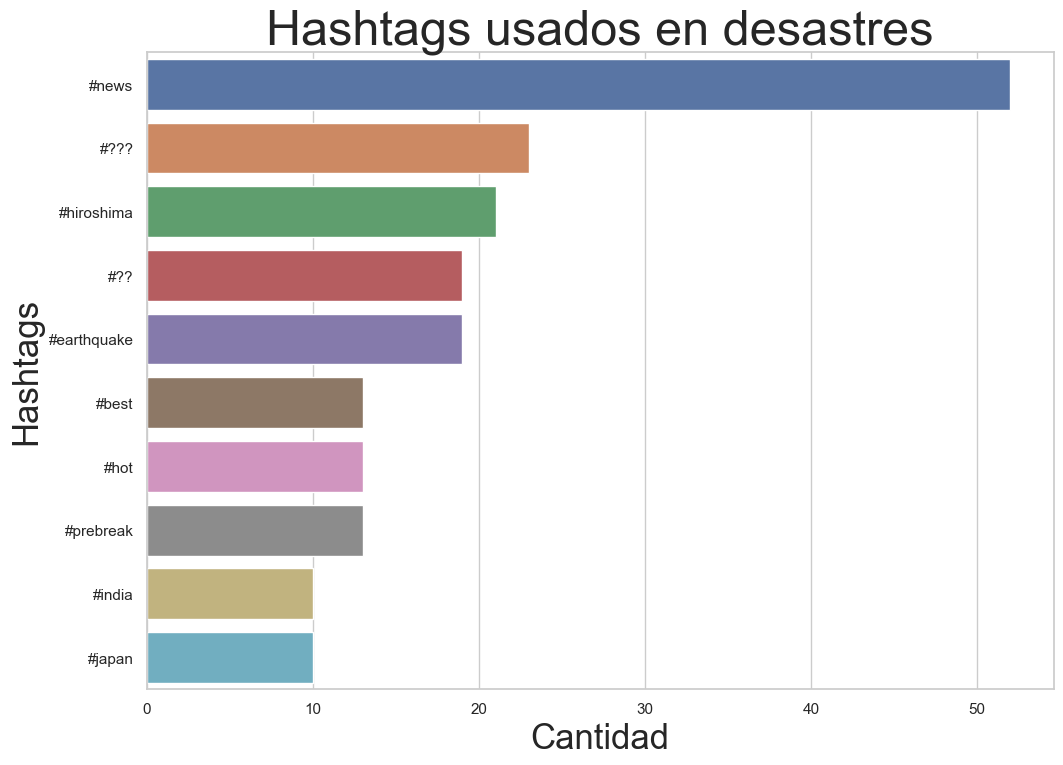

In [14]:
#split column Message to new df, create Serie by stack
s = (target1_WC.hashtags.str.split(expand=True).stack())
plt.figure(figsize=(11.7, 8.27))
#remove multiindex
s.index = s.index.droplevel(-1)
hashtag1_WC = s.to_frame('hash')
hashtag1_WC.reset_index(inplace=True)
hashtagss_count1 = hashtag1_WC.groupby('hash')['index'].count().reset_index(name='count')
barplot1 = hashtagss_count1.nlargest(10,'count')
ax = sns.barplot(data=barplot1, x='count',y='hash')
ax.axes.set_title("Hashtags usados en desastres",fontsize=35)
ax.set_xlabel("Cantidad",fontsize=25)
ax.set_ylabel("Hashtags",fontsize=25)
plt.show()

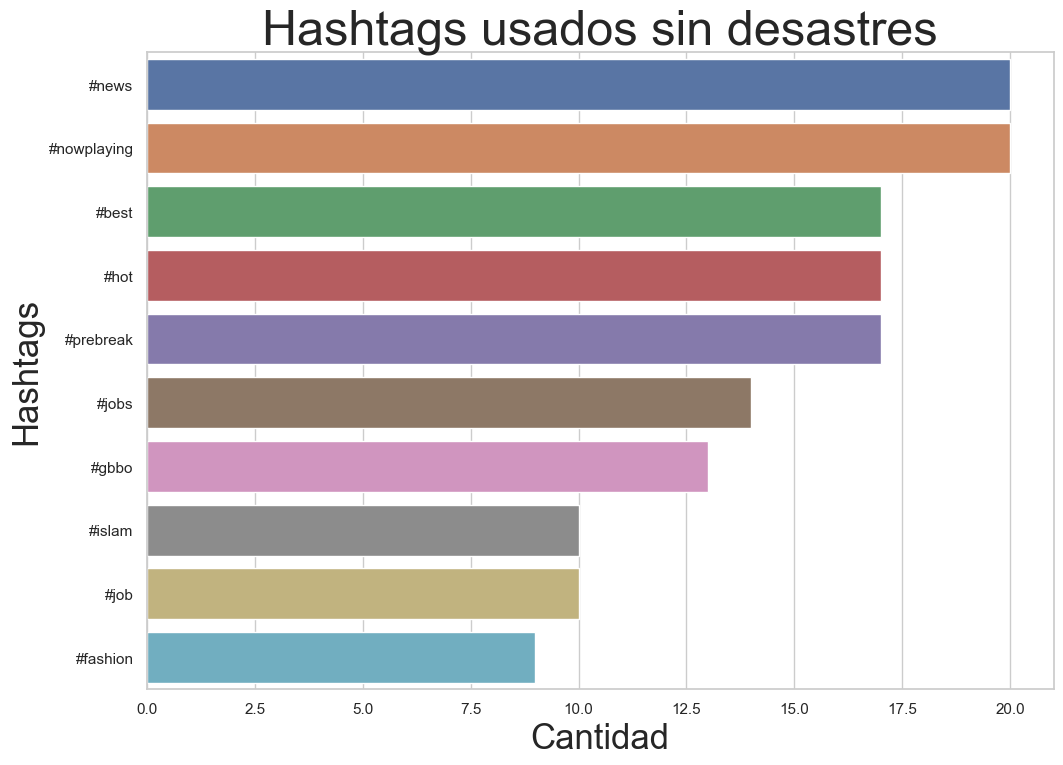

In [15]:
#split column Message to new df, create Serie by stack
s = (target0_WC.hashtags.str.split(expand=True).stack())
plt.figure(figsize=(11.7, 8.27))
#remove multiindex
s.index = s.index.droplevel(-1)
hashtag0_WC = s.to_frame('hash')
hashtag0_WC.reset_index(inplace=True)
hashtagss_count0 = hashtag0_WC.groupby('hash')['index'].count().reset_index(name='count')
barplot0 = hashtagss_count0.nlargest(10,'count')
ax = sns.barplot(data=barplot0, x='count',y='hash')
ax.axes.set_title("Hashtags usados sin desastres",fontsize=35)
ax.set_xlabel("Cantidad",fontsize=25)
ax.set_ylabel("Hashtags",fontsize=25)
plt.show()

In [16]:
datos.groupby('target').count().reset_index()

,target,id,keyword,location,text,length,totalwords,words,hashtags,matches,language,hashtagsCantidad
0,0,4342,4323,2884,4342,4342,4342,4342,4342,4342,4342,4342
1,1,3271,3229,2196,3271,3271,3271,3271,3271,3271,3271,3271


In [17]:
datos['tieneHashtag'] = 'NO Tiene'
datos.loc[datos['hashtagsCantidad'] > 0, 'tieneHashtag'] = 'Tiene'

In [18]:
#Obtenemos las cantidades de propiedades con gimnasio
hashSI = (datos[datos['tieneHashtag'] == 'Tiene']).id.count()
hashNO = (datos[datos['tieneHashtag'] == 'NO Tiene']).id.count()

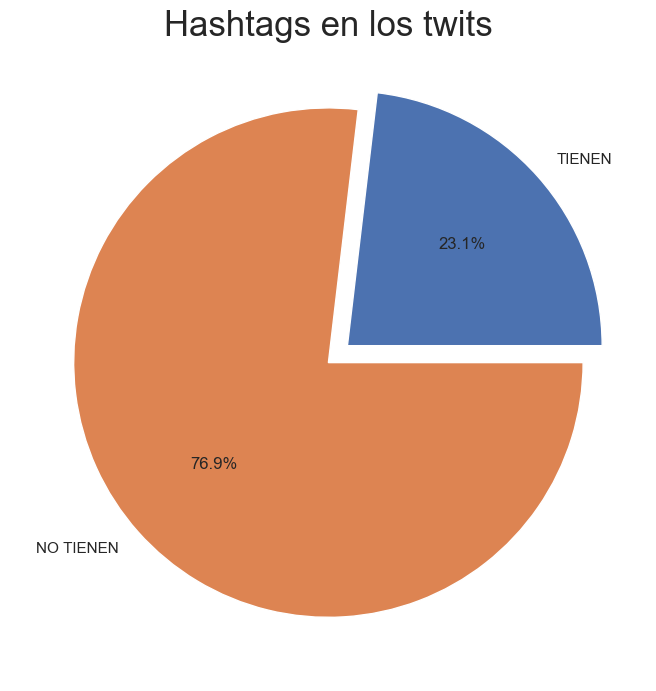

In [19]:
sizes = [hashSI, hashNO]
nombres = ['TIENEN','NO TIENEN']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Hashtags en los twits', fontsize=25)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, explode=(0.1, 0))
plt.show()

In [20]:
asd = datos.groupby(['target','tieneHashtag']).count().reset_index()
asd.head()

,target,tieneHashtag,id,keyword,location,text,length,totalwords,words,hashtags,matches,language,hashtagsCantidad
0,0,NO Tiene,3456,3438,2248,3456,3456,3456,3456,3456,3456,3456,3456
1,0,Tiene,886,885,636,886,886,886,886,886,886,886,886
2,1,NO Tiene,2396,2374,1594,2396,2396,2396,2396,2396,2396,2396,2396
3,1,Tiene,875,855,602,875,875,875,875,875,875,875,875


In [21]:
# create plot
# sns.barplot(x = 'tieneHashtag', y = 'hashtagsCantidad', hue = 'target', data = asd,
 #            palette = 'hls',
  #           order = ['male', 'female'],  
   #          capsize = 0.05,             
    #         saturation = 8,             
     #        errcolor = 'gray', errwidth = 2,  
      #       ci = 'sd'   
       #      )
#  plt.show()

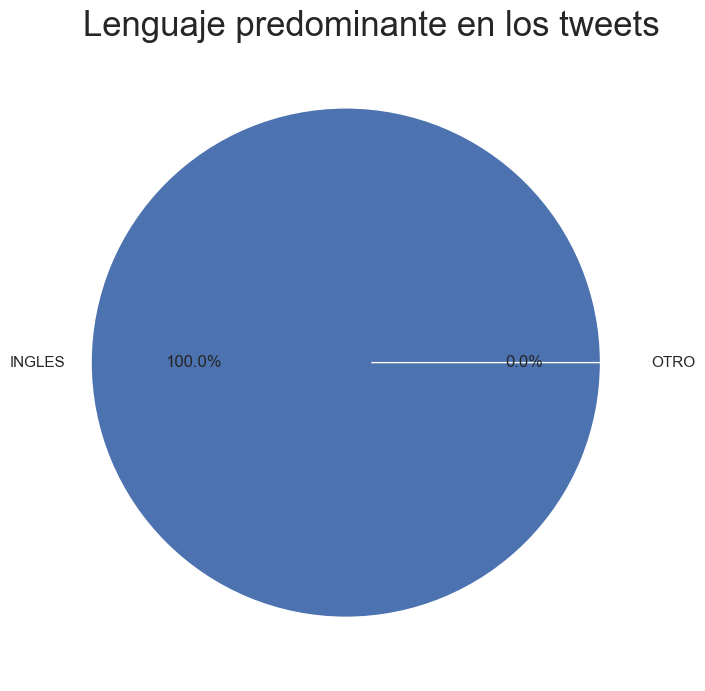

In [22]:
#Obtenemos las cantidades de propiedades con gimnasio
engSI = (datos[datos['language'] == 'en']).language.count()
engNO = (datos[datos['language'] != 'en']).language.count()
sizes = [engSI, engNO]
nombres = ['INGLES','OTRO']
# Tamaño para hojas A4.
plt.figure(figsize=(11.7, 8.27))
plt.title('Lenguaje predominante en los tweets', fontsize=25)
plt.pie(sizes, labels=nombres, autopct='%1.1f%%', shadow=False, explode=(0.1, 0))
plt.show()

In [23]:
target0.head()

,id,keyword,location,text,target,length,totalwords,words,hashtags,matches,language,hashtagsCantidad
32,49,ablaze,Est. September 2012 - Bristol,we always try to bring the heavy. #metal #rt http://t.co/yao1e0xngw,0,67,10,"[we, always, try, to, bring, the, heavy., #metal, #rt, http://t.co/yao1e0xngw]",#metal #rt,0,en,2
34,52,ablaze,"Philadelphia, PA",crying out for more! set me ablaze,0,34,7,"[crying, out, for, more!, set, me, ablaze]",,1,en,0
35,53,ablaze,"London, UK",on plus side look at the sky last night it was ablaze http://t.co/qqsmshaj3n,0,76,13,"[on, plus, side, look, at, the, sky, last, night, it, was, ablaze, http://t.co/qqsmshaj3n]",,1,en,0
36,54,ablaze,Pretoria,@phdsquares #mufc they've built so much hype around new acquisitions but i doubt they will set the epl ablaze this season.,0,122,21,"[@phdsquares, #mufc, they've, built, so, much, hype, around, new, acquisitions, but, i, doubt, they, will, set, the, epl, ablaze, this, season.]",#mufc,1,en,1
39,57,ablaze,Paranaque City,ablaze for you lord :d,0,22,5,"[ablaze, for, you, lord, :d]",,1,en,0


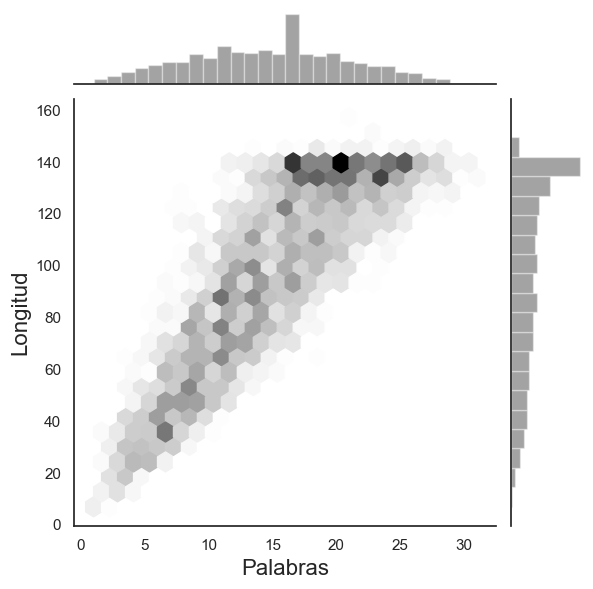

In [24]:
with sns.axes_style("white"):
    h = sns.jointplot(x=target0['totalwords'], y=target0['length'], kind="hex", color="k");
    h.set_axis_labels('Palabras', 'Longitud', fontsize=16)

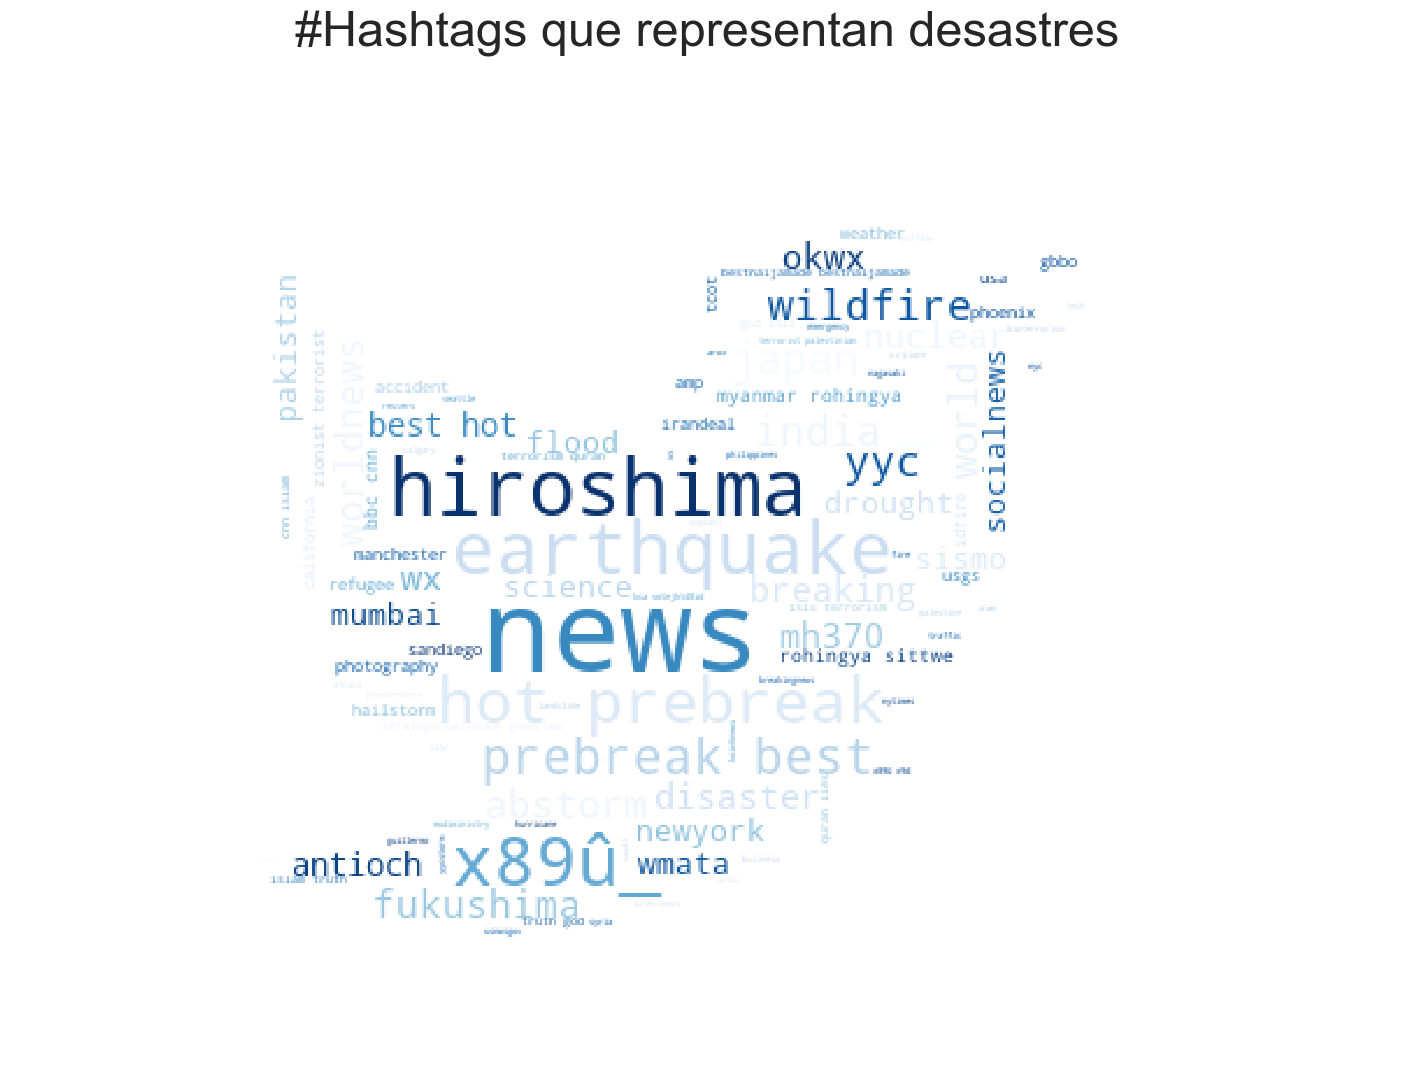

In [25]:
wave_mask = np.array(Image.open("tuita.jpg"))
 
wordcloud = WordCloud(mask=wave_mask, colormap="Blues",max_font_size=50, max_words=100,background_color="white").generate(str(target1.hashtags.values).replace("'", "").replace(" ",""))
plt.title('#Hashtags que representan desastres',fontsize=35)
plt.margins(x=0, y=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

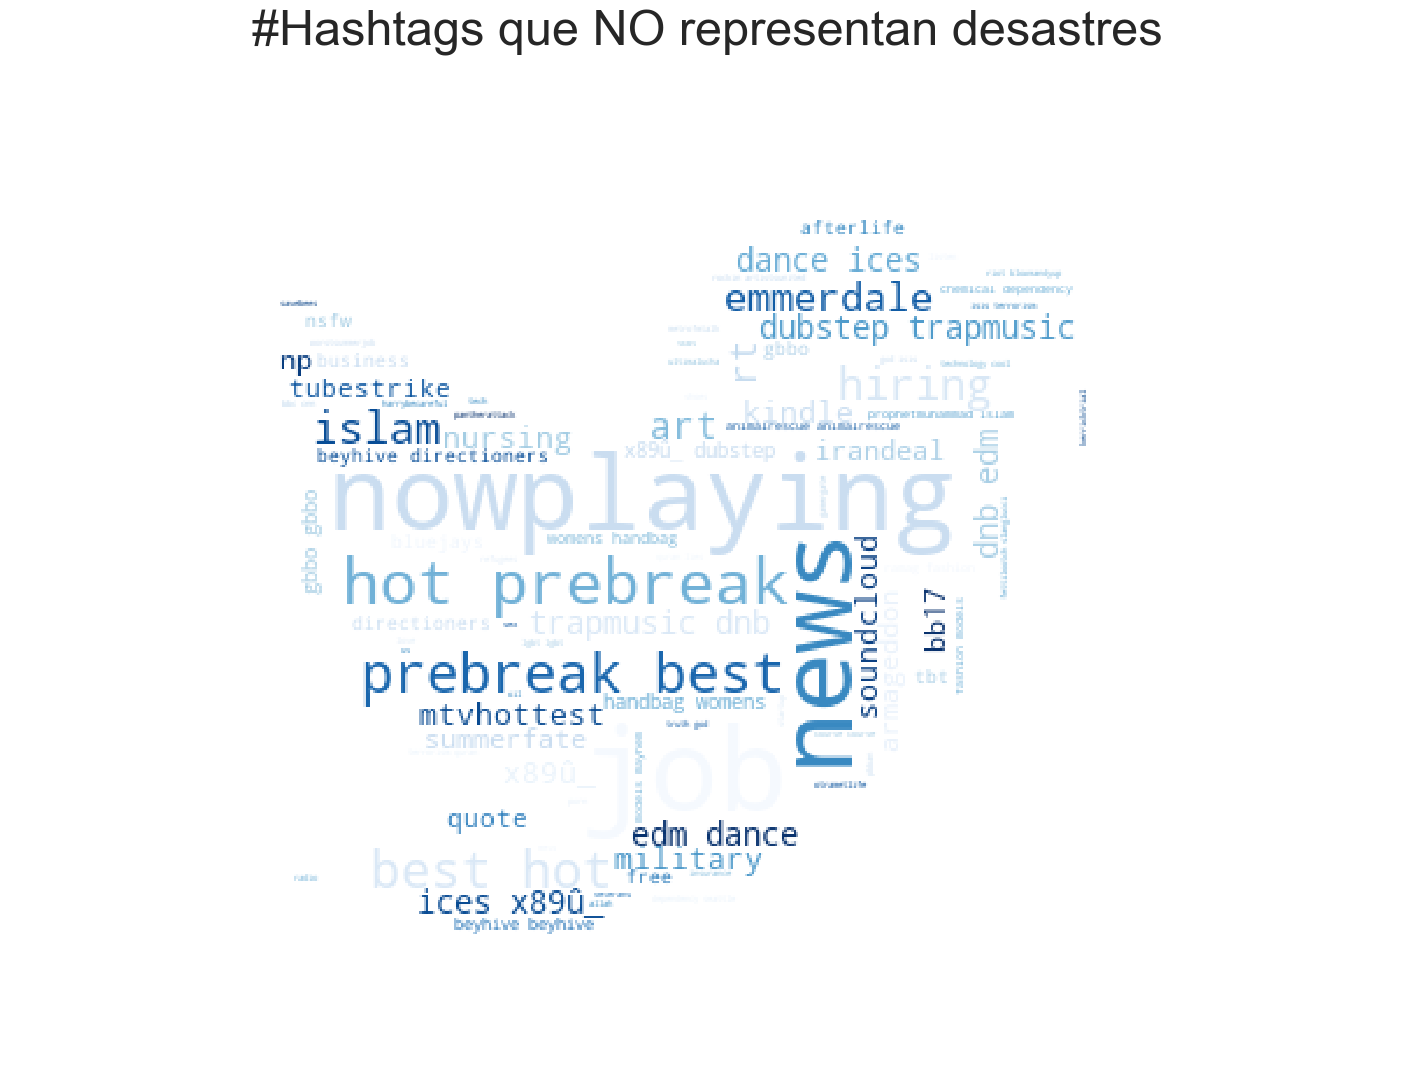

In [26]:
wave_mask = np.array(Image.open("tuita.jpg"))
 
wordcloud = WordCloud(mask=wave_mask, colormap="Blues",max_font_size=50, max_words=100,background_color="white").generate(str(target0.hashtags.values).replace("'", "").replace(" ",""))
plt.title('#Hashtags que NO representan desastres',fontsize=35)
plt.margins(x=0, y=0)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [27]:
target1.head()
result = target1.groupby(['keyword']).agg({'id':'count','matches':'sum','totalwords':np.average,'length':np.average, 'hashtagsCantidad':'sum'}).reset_index()
result.rename(columns={'id':'Cantidad', 'matches':'Palabras claves', 'totalwords': 'Total de palabras', 'length':'Longitud', 'hashtagsCantidad':'Cantidad de hashtags'}, inplace=True)
result.head()

,keyword,Cantidad,Palabras claves,Total de palabras,Longitud,Cantidad de hashtags
0,ablaze,13,17,12.538462,96.615385,7
1,accident,24,22,14.666667,97.500000,14
2,airplane%20accident,30,40,15.100000,109.166667,33
3,ambulance,20,35,12.750000,105.100000,9
4,annihilated,11,7,16.000000,112.545455,0


In [28]:
target1matches2 = target1.loc[target1['matches'] > 0]
keywordsMAX = target1matches2.groupby(['keyword'])["id"].count().reset_index(name="cantidad").nlargest(10, 'cantidad')
keywordsMAX.head(10)

,keyword,cantidad
210,wreckage,39
57,debris,37
145,outbreak,37
197,typhoon,36
158,rescuers,32
177,suicide%20bomb,32
90,evacuated,29
154,razed,29
28,bridge%20collapse,27
91,evacuation,27


In [40]:
target0matches2 = target1.loc[target1['matches'] > 0]
keywordsMIN = target0matches2.groupby(['keyword'])["id"].count().reset_index(name="cantidad").nsmallest(100, 'cantidad')
keywordsMIN.head(200)

,keyword,cantidad
7,armageddon,1
18,blazing,1
21,blizzard,1
24,body%20bagging,1
48,crush,1
...,...,...
99,fatality,9
129,landslide,9
182,survived,9
208,wounds,9


In [33]:
resultTarget1MAX = result.nlargest(200, 'Cantidad')
resultTarget1MIN = result.nsmallest(200, 'Cantidad')
#outbreak = resultTarget1.loc[resultTarget1['keyword'] == 'outbreak']
#lista = [outbreak['Cantidad'],outbreak['Palabras claves']]

In [31]:
def obtenerValuesDelRow(df):
    my_list = []
    for index, rows in df.iterrows(): 
        my_list = [rows['Cantidad'], rows['Palabras claves'], rows['Total de palabras'], rows['Cantidad de hashtags']] 
    return my_list

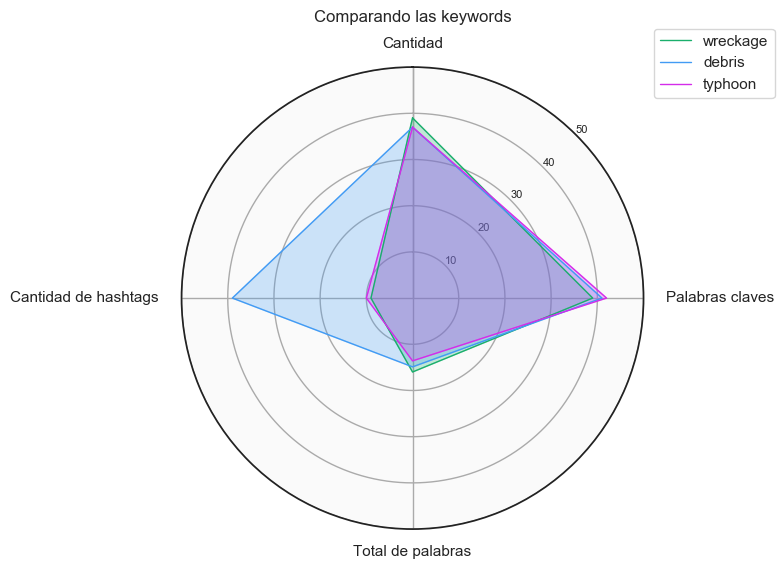

In [35]:
# Each attribute we'll plot in the radar chart.
labels = ['Cantidad', 'Palabras claves', 'Total de palabras', 'Cantidad de hashtags']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color):
  outbreak = resultTarget1MAX.loc[resultTarget1MAX['keyword'] == car_model]  
  values = obtenerValuesDelRow(outbreak) #resultTarget1.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('wreckage', '#1aaf6c')
add_to_radar('debris', '#429bf4')
add_to_radar('typhoon', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 50)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)
# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')
# Add title.
ax.set_title('Comparando las keywords', y=1.08)
# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

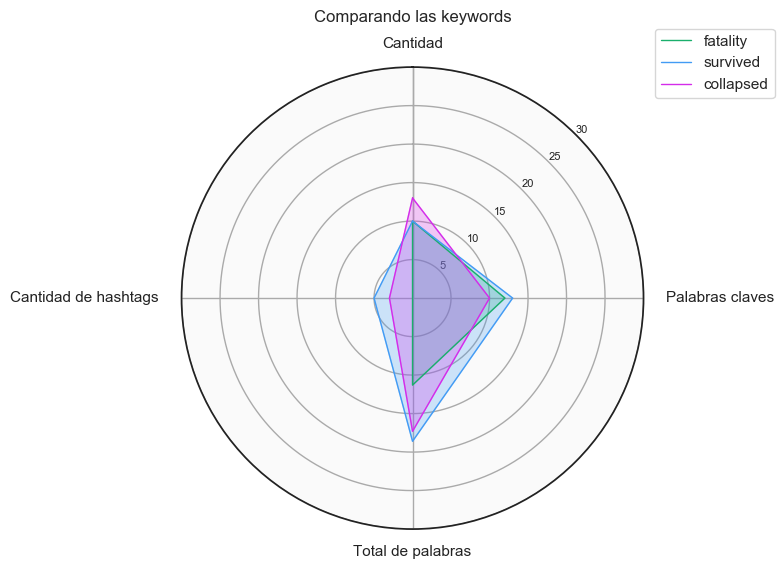

In [43]:
# Each attribute we'll plot in the radar chart.
labels = ['Cantidad', 'Palabras claves', 'Total de palabras', 'Cantidad de hashtags']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color):
  outbreak = resultTarget1MIN.loc[resultTarget1MIN['keyword'] == car_model]  
  values = obtenerValuesDelRow(outbreak) #resultTarget1.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar('fatality', '#1aaf6c')
add_to_radar('survived', '#429bf4')
add_to_radar('collapsed', '#d42cea')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 30)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)
# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=8)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')
# Add title.
ax.set_title('Comparando las keywords', y=1.08)
# Add a legend as well.
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))